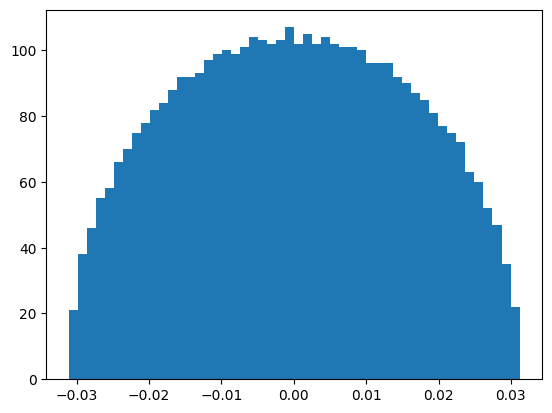

In [1]:
import os
import numpy as np
from numpy.linalg import eigvalsh
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, kron
from itertools import product, combinations

paulis = [np.eye(2), np.array([[0,1],[1,0]]), 1j*np.array([[0,-1],[1,0]]), np.array([[1,0],[0,-1]])]
paulis_sparse = [coo_matrix(p, dtype='complex128') for p in paulis]

def operator_from_indexes(indexes, dtype='float64'):
    """
    indexes : list of pauli string indexes (eg [0,1,2,0,3])
    return : coo_matrix representing a pauli string (eg 1XY1Z)
    """
    op = paulis_sparse[indexes[0]]
    for i in indexes[1:]:
        op = kron(op, paulis_sparse[i], format='coo')
    if dtype=='float64':
        op = op.real
    return coo_matrix(op, dtype=dtype)


def Hab(Jab, a, b):
    """
    return the hamiltonian corresponding to a particular interraction type, eg XZ:
    sum_ij Jabij sigma_i^b sigma_j^a
    Jab : matrix of couplings
    a: interraction type
    b: interraction type
    """
    N = len(Jab)
    H = np.zeros((2**N, 2**N))
    for i, j in list(combinations(range(N), 2)):
        pauli_indexes = np.zeros(N, dtype=int)
        pauli_indexes[i] = a
        pauli_indexes[j] = b
        tau = operator_from_indexes(pauli_indexes)
        H[tau.row, tau.col] += Jab[i,j]*tau.data
    return H

def H_from_couplings(N, k):
    """
    return a dense hamiltonian from the saved couplings
    N: system size
    k: sample number
    """
    letters = ['1', 'X', 'Y', 'Z']
    H = 0
    for a,b in [(1,3),(1,1),(2,2),(3,3),(3,1)]:
        Jab = np.loadtxt('couplings/{}/{}_{}{}.txt'.format(N, k, letters[a], letters[b]))
        H += Hab(Jab, a, b)
    return H

if __name__ =='__main__':
    N = 12 # system size
    k = 0 # sample number
    H = H_from_couplings(12, 0) # build a hamiltonian from the couplings
    e = eigvalsh(H) # compute its spectrum
    plt.hist(e, bins=50) # plot the density of states (semicircle)
    plt.show()


In [20]:

def couplings(N, k):
    letters = ['1', 'X', 'Y', 'Z']
    for a,b in [(1,3),(1,1),(2,2),(3,3),(3,1)]:
        Jab = np.loadtxt('couplings/{}/{}_{}{}.txt'.format(N, k, letters[a], letters[b]))
    return H


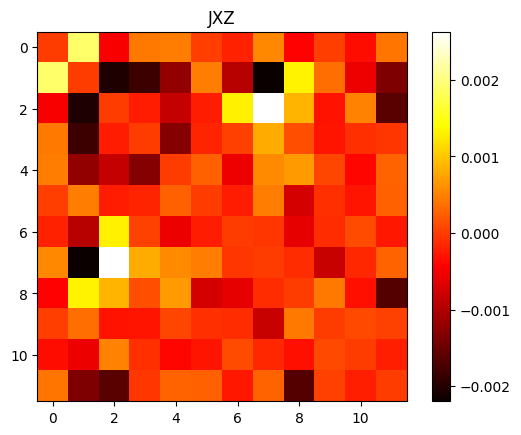

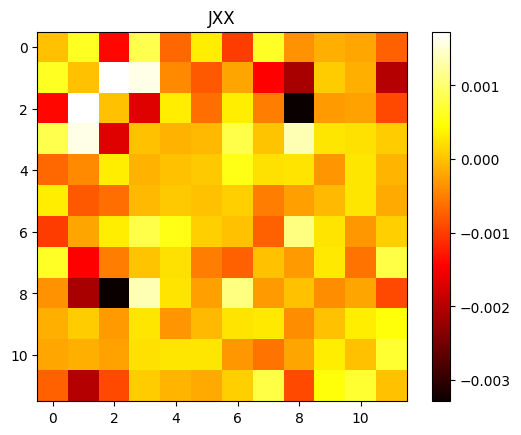

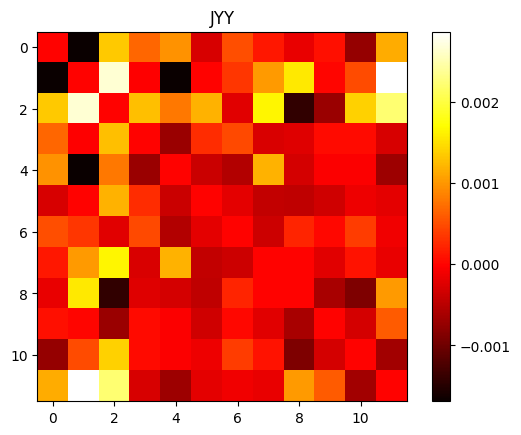

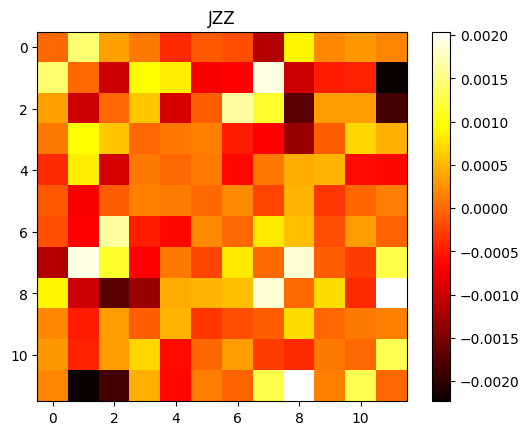

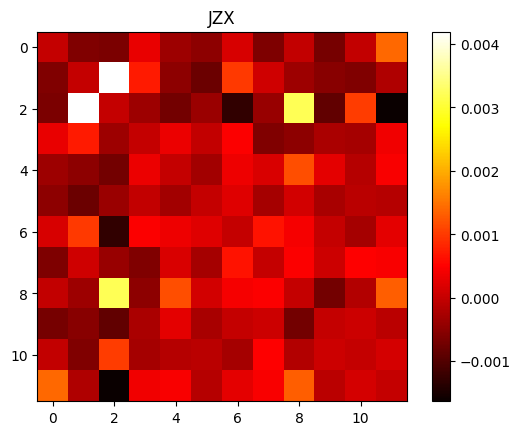

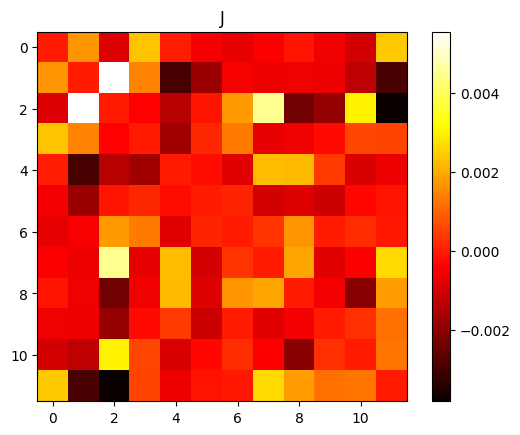

In [25]:
N = 12 # system size
k = 0 # sample number
letters = ['1', 'X', 'Y', 'Z']
for a,b in [(1,3),(1,1),(2,2),(3,3),(3,1)]:
    Jab = np.loadtxt('couplings/{}/{}_{}{}.txt'.format(N, k, letters[a], letters[b]))
    plt.imshow(Jab, cmap='hot', interpolation='nearest')
    plt.title(f"J{letters[a]}{letters[b]}")
    plt.colorbar()
    plt.show()

J = np.loadtxt('couplings/{}/{}_{}{}.txt'.format(N, k, letters[1], letters[3]))
for a,b in [(1,1),(2,2),(3,3),(3,1)]:
    Jab = np.loadtxt('couplings/{}/{}_{}{}.txt'.format(N, k, letters[a], letters[b]))
    J+=Jab
plt.imshow(J, cmap='hot', interpolation='nearest')
plt.title(f"J")
plt.colorbar()
plt.show()

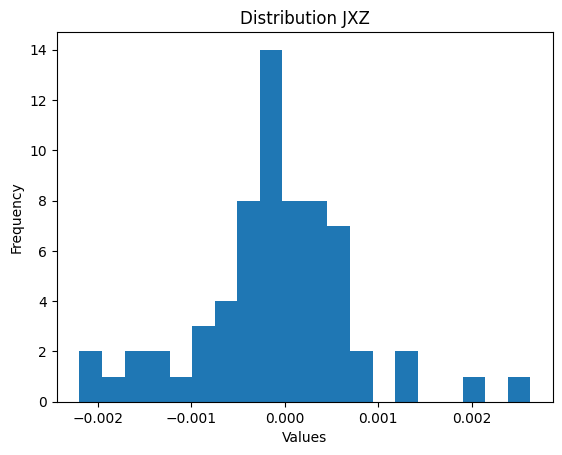

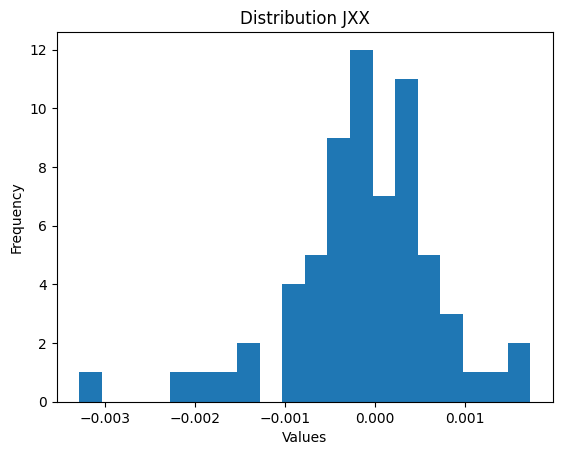

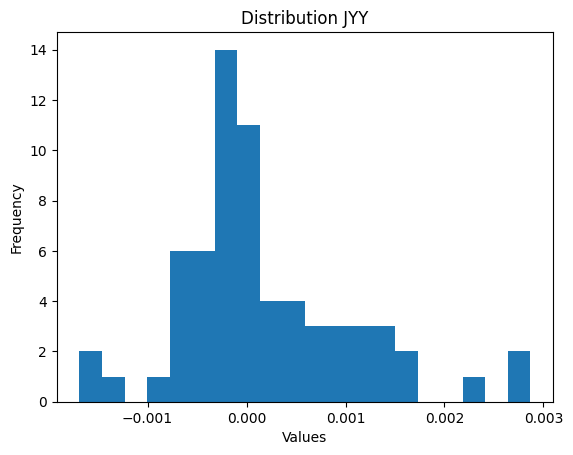

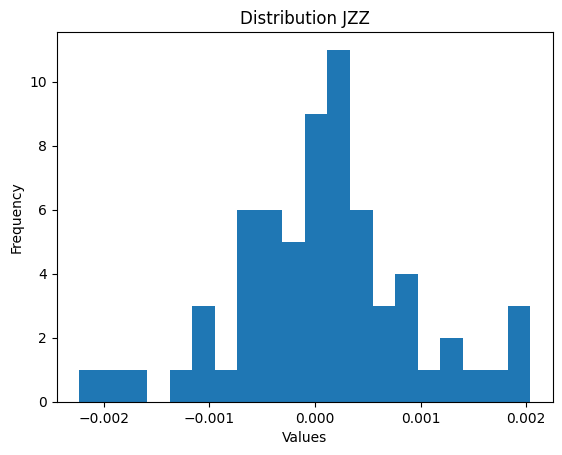

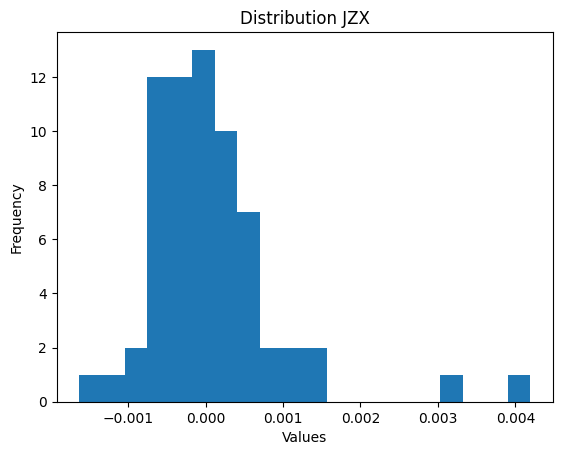

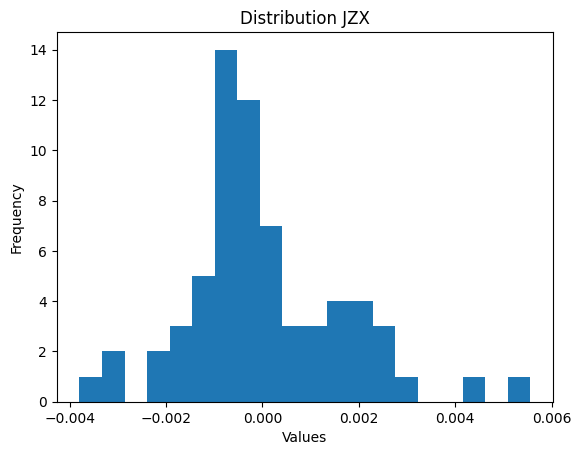

In [26]:
#Take the top half of the heat matrix and plot the distribution by value...

def plot_Jab_dist(Jab):
    # Get the shape of the matrix
    rows, cols = Jab.shape
    letters = ['1', 'X', 'Y', 'Z']
    # Get the top half of the values into an array
    top_half_values = []
    for i in range(rows):
        for j in range(i+1, cols):
            top_half_values.append(Jab[i][j])
    # Plot a distribution of these values binned by values
    import matplotlib.pyplot as plt

    plt.hist(top_half_values, bins=20)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Distribution J{letters[a]}{letters[b]}')
    plt.show()

for a,b in [(1,3),(1,1),(2,2),(3,3),(3,1)]:
    Jab = np.loadtxt('couplings/{}/{}_{}{}.txt'.format(N, k, letters[a], letters[b]))
    plot_Jab_dist(Jab)

plot_Jab_dist(J)